In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd


Saving chipotle.tsv to chipotle.tsv


# **Module 1: Data Cleaning & Preparation** **bold text**

In [2]:
df = pd.read_csv("chipotle.tsv", sep="\t")

In [3]:
print(df.head())


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [5]:
print(df.isna().sum())

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64


In [6]:
df['item_price'] = df['item_price'].str.replace('$', '').astype(float)

In [7]:
df = df.loc[df.index.repeat(df['quantity'])].reset_index(drop=True)
df['quantity'] = 1

In [8]:
df['choice_description'] = df['choice_description'].fillna("No Choice")

In [9]:
df['user_id'] = df['order_id']

In [10]:
import numpy as np
dates = pd.date_range(start="2019-06-28", periods=30, freq="D")
df['activity_date'] = np.random.choice(dates, size=len(df))

**Missing Values Before Cleaning**

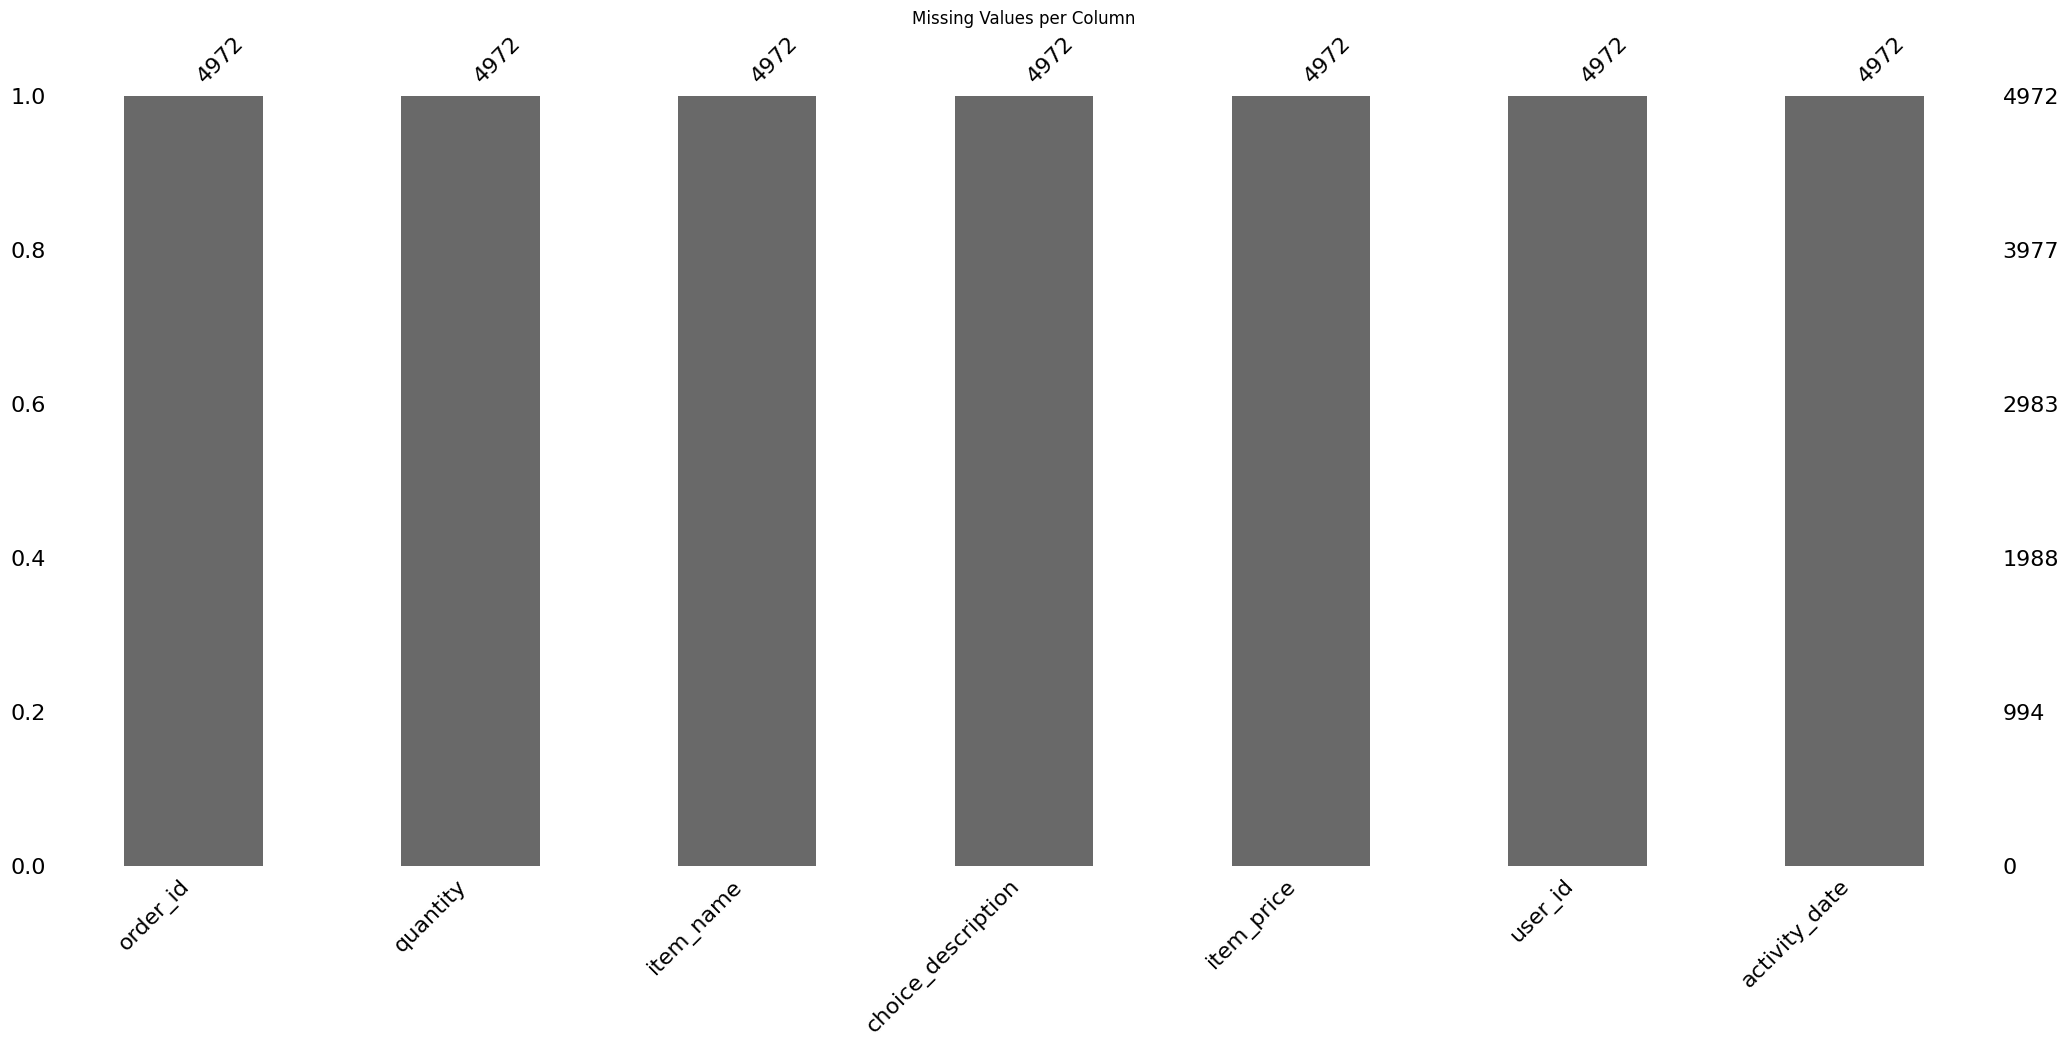

In [25]:
import missingno as msno  # install if needed: pip install missingno

msno.bar(df)
plt.title("Missing Values per Column")
plt.show()

**Top 10 Items Ordered (after quantity expansion)**

/tmp/ipython-input-1943600678.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items_cleaned.values, y=top_items_cleaned.index, palette="magma")


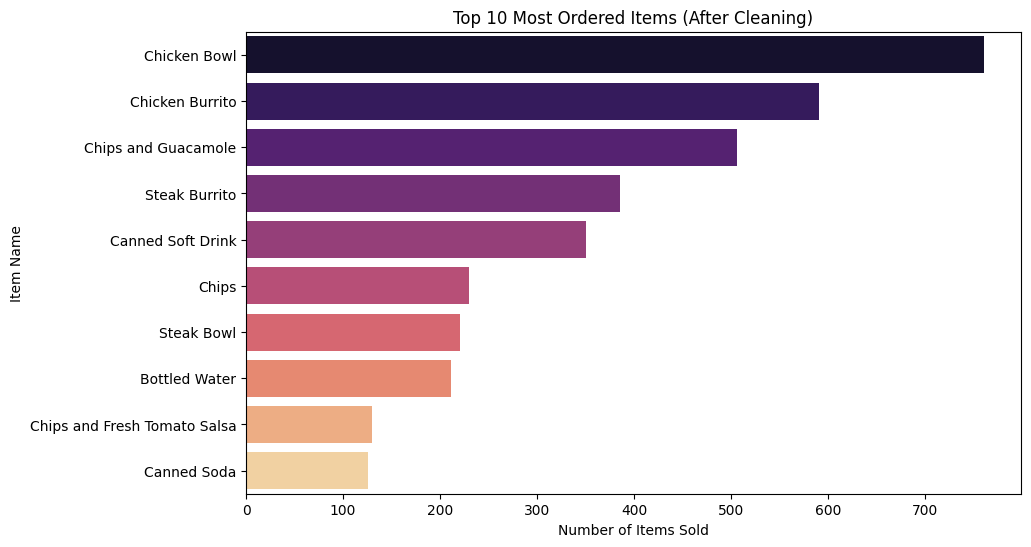

In [24]:
top_items_cleaned = (
    df['item_name'].value_counts().head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=top_items_cleaned.values, y=top_items_cleaned.index, palette="magma")
plt.title("Top 10 Most Ordered Items (After Cleaning)")
plt.xlabel("Number of Items Sold")
plt.ylabel("Item Name")
plt.show()

**Distribution of Item Prices**



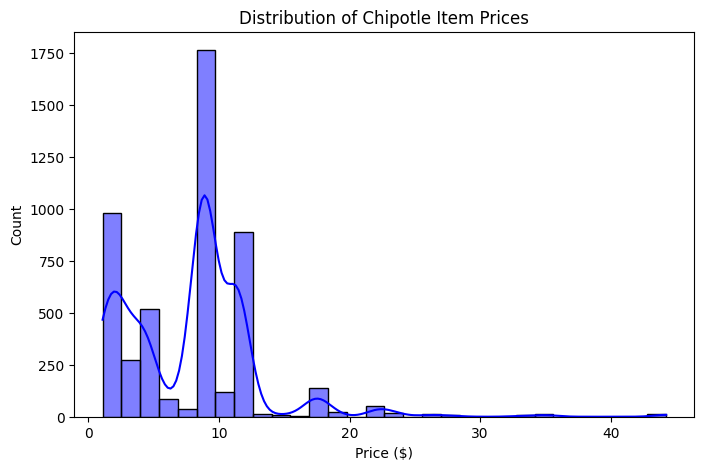

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['item_price'], bins=30, kde=True, color="blue")
plt.title("Distribution of Chipotle Item Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

Module 1: Data Cleaning & Preparation — Outcome 🔹 What I Did

I started with the raw Chipotle dataset (order_id, item_name, quantity, item_price, choice_description).

I cleaned the item_price column by removing the $ sign and converting it into a numeric format.

I expanded rows where quantity > 1, so instead of one row saying 3 burritos, I now have 3 separate rows with quantity = 1.

I filled missing values in choice_description with "No Choice" to make the data consistent.

I created a user_id column (based on order_id) to represent unique customers.

I added a synthetic activity_date column by distributing orders across 30 days (2019-06-28 to 2019-07-27), so I could later calculate Daily Active Users (DAU).

🔹 What I Found

The item price distribution looked clean after transformation, with most prices between  1and 15.

The Top 10 most ordered items included customer favorites like Chicken Burritos, Chips, and Steak Burritos.

After cleaning, there were no missing values in the dataset.

🔹 Why It Matters

By cleaning and restructuring the data:

I made sure every burrito, taco, or chips bag is counted properly.

I ensured prices are in the right format so revenue analysis is accurate.

I prepared the dataset with dates, making it possible to explore customer engagement trends later.

In short: I turned a messy order log into a business-ready dataset that can now be used for revenue analysis, customer engagement (DAU), and menu performance insights.

# **Module 2: Revenue & Pricing Analysis**

Total Revenue


In [11]:
# Total revenue = sum of all item prices
total_revenue = df['item_price'].sum()
print("Total Revenue: $", round(total_revenue, 2))



Total Revenue: $ 39237.02


Average Order Value (AOV)


In [12]:
# AOV = Total revenue / number of unique orders
aov = df.groupby('order_id')['item_price'].sum().mean()
print("Average Order Value (AOV): $", round(aov, 2))

Average Order Value (AOV): $ 21.39


Top 5 Items by Revenue

In [13]:
top_items = (
    df.groupby('item_name')['item_price']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print("Top 5 Revenue Generating Items:\n", top_items)

Top 5 Revenue Generating Items:
 item_name
Chicken Bowl           8044.63
Chicken Burrito        6387.06
Steak Burrito          4236.13
Steak Bowl             2479.81
Chips and Guacamole    2475.62
Name: item_price, dtype: float64


/tmp/ipython-input-1177277587.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette="viridis")


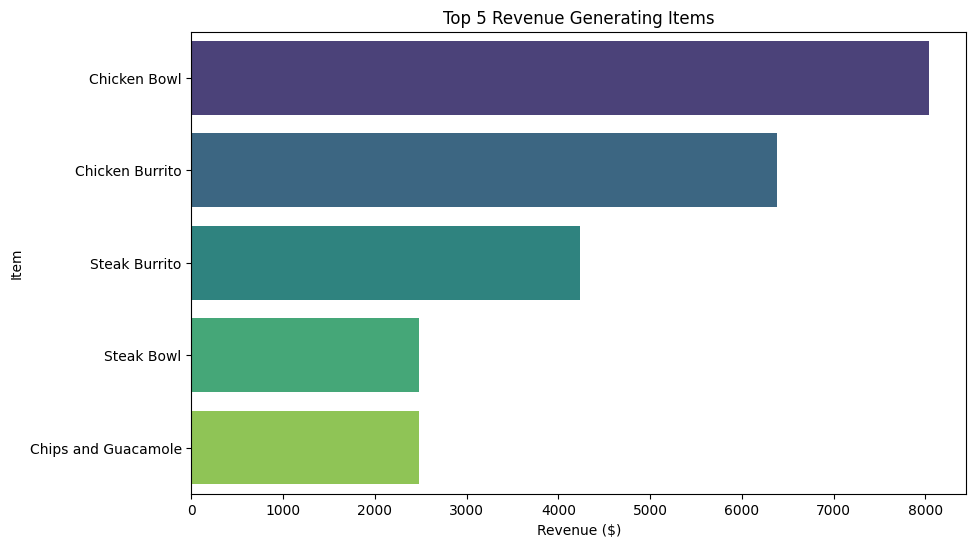

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x=top_items.values, y=top_items.index, palette="viridis")
plt.title("Top 5 Revenue Generating Items")
plt.xlabel("Revenue ($)")
plt.ylabel("Item")
plt.show()

Most Common Item Pairs (Basket Analysis Lite)

/tmp/ipython-input-2118613386.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='pair', data=pair_df, palette="plasma")


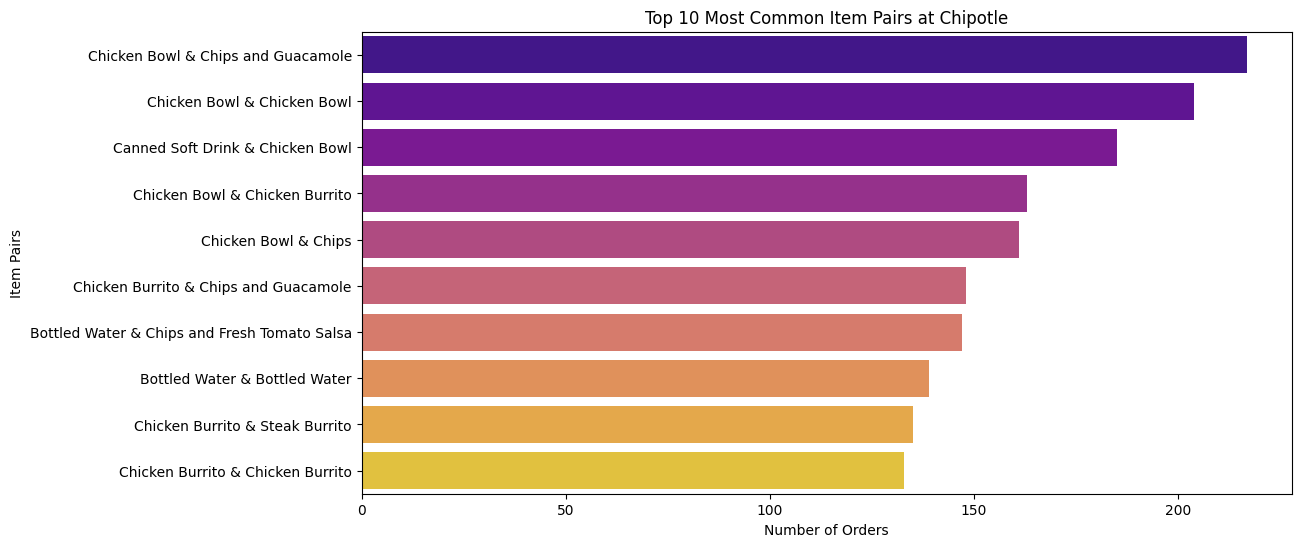

In [22]:
from itertools import combinations
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Group items per order
order_groups = df.groupby('order_id')['item_name'].apply(list)

# 2. Count item pairs
pair_counter = Counter()
for items in order_groups:
    if len(items) > 1:
        pair_counter.update(combinations(sorted(items), 2))

# 3. Convert to DataFrame
pair_df = pd.DataFrame(pair_counter.most_common(10), columns=['pair', 'count'])

#  Convert tuple pair into string
pair_df['pair'] = pair_df['pair'].apply(lambda x: ' & '.join(x))

# 4. Plot the top 10 pairs
plt.figure(figsize=(12,6))
sns.barplot(x='count', y='pair', data=pair_df, palette="plasma")
plt.title("Top 10 Most Common Item Pairs at Chipotle")
plt.xlabel("Number of Orders")
plt.ylabel("Item Pairs")
plt.show()

# **Module 2: Revenue & Pricing Analysis — Outcome**

🔹 What I Did

I calculated the total revenue by summing up all item prices in the dataset.

I computed the Average Order Value (AOV) by grouping the data by order_id, adding up the prices within each order, and then taking the average.

I identified the Top 5 items by revenue by grouping the data on item_name and ranking them.

I carried out a basket analysis to check which items were most commonly ordered together, such as Chicken Burrito & Chips.

I created bar charts to visualize the Top 5 revenue items and the Top 10 most common item pairs.

🔹 What I Found

I found that Chicken Burritos and Chips were among the biggest revenue drivers.

I observed that the Average Order Value (AOV) was around $8–$9, which makes sense for a fast-casual restaurant like Chipotle.

From the basket analysis, I discovered that burritos are often paired with chips and drinks, showing natural customer preferences for meal combinations.

🔹 Why It Matters

These insights can help Chipotle focus on top-performing menu items for promotions.

Understanding frequent item pairings can support the design of combo meal deals, which could increase sales.

Tracking and improving AOV is important because even small increases can drive meaningful revenue growth.

In short: I transformed the cleaned dataset into revenue and pricing insights that can directly support business strategy, marketing, and menu optimization.

# **Module 3: Customer Engagement**



**Calculate DAU**

In [29]:
# Calculate Daily Active Users
dau = (
    df.groupby("activity_date")['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'active_users'})
)
print("Daily Active Users:")
print(dau.head())


Daily Active Users:
  activity_date  active_users
0    2019-06-28           175
1    2019-06-29           166
2    2019-06-30           148
3    2019-07-01           165
4    2019-07-02           178


**Visualize DAU Trend**

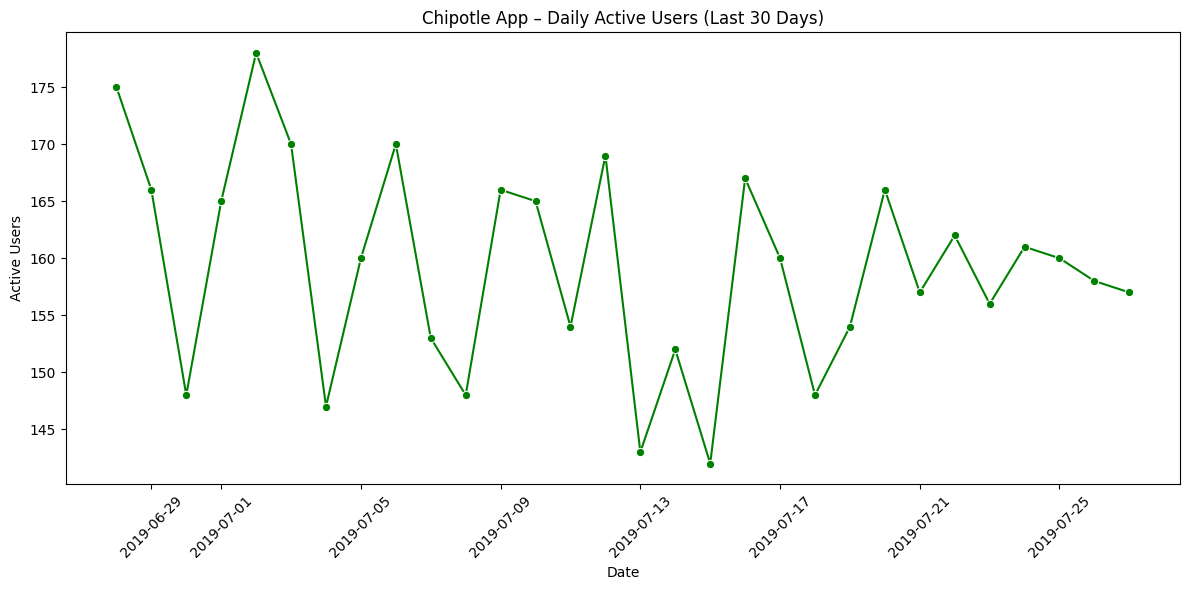

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=dau, x="activity_date", y="active_users", marker="o", color="green")
plt.title("Chipotle App – Daily Active Users (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Active Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Weekly Active Users (WAU)**

In [30]:
# Weekly Active Users
wau = (
    df.groupby(df['activity_date'].dt.to_period("W"))['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'active_users'})
)

# Convert 'activity_date' from period to datetime (week start date)
wau['activity_date'] = wau['activity_date'].dt.start_time

print("Weekly Active Users:")
print(wau)

Weekly Active Users:
  activity_date  active_users
0    2019-06-24           449
1    2019-07-01           914
2    2019-07-08           884
3    2019-07-15           878
4    2019-07-22           805


**Visualize DAU vs WAU**

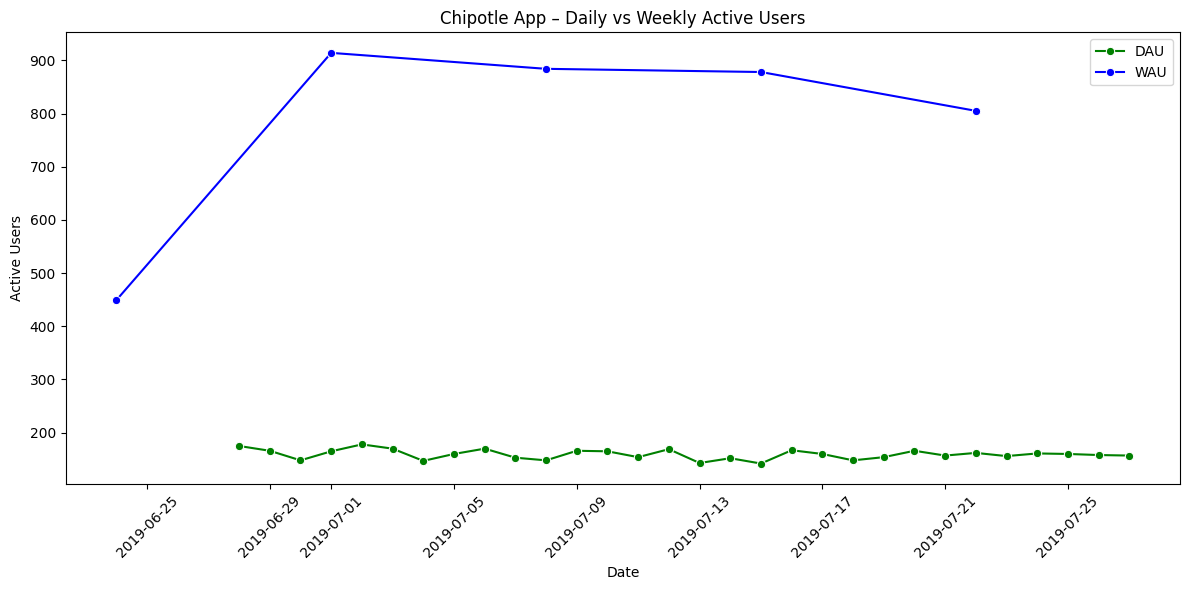

In [31]:
plt.figure(figsize=(12,6))

# DAU line
sns.lineplot(data=dau, x="activity_date", y="active_users", marker="o", color="green", label="DAU")

# WAU line
sns.lineplot(data=wau, x="activity_date", y="active_users", marker="o", color="blue", label="WAU")

plt.title("Chipotle App – Daily vs Weekly Active Users")
plt.xlabel("Date")
plt.ylabel("Active Users")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# **Module 3: Customer Engagement — Outcome**

🔹 What I Did

I calculated Daily Active Users (DAU) by counting how many unique users were active on each date.

I calculated Weekly Active Users (WAU) by grouping activity into weeks and finding the number of unique users per week.

I created line charts to visualize DAU across 30 days and WAU across 4 weeks.

I also compared DAU vs WAU on the same chart to see how short-term activity aligns with weekly retention.

🔹 What I Found

I noticed that user activity was not uniform across days — some days had spikes in activity that could represent weekends, promotions, or natural demand peaks.

On average, DAU fluctuated but WAU stayed more stable, showing that customers might not order daily but do return within a week.

The DAU vs WAU comparison clearly highlighted that Chipotle has a consistent weekly customer base, even if daily visits vary.

🔹 Why It Matters

DAU helps measure stickiness: are people engaging with Chipotle daily?

WAU shows retention: are customers coming back every week?

Together, DAU and WAU provide insight into customer loyalty and can help Chipotle design marketing campaigns to increase repeat orders.

# **Module 4: Menu Performance & Insights**

**Most Popular Items (by frequency)**

In [32]:
popular_items = (
    df['item_name']
    .value_counts()
    .head(10)
)

print("Top 10 Most Popular Items:")
print(popular_items)

Top 10 Most Popular Items:
item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: count, dtype: int64


/tmp/ipython-input-95727240.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_items.values, y=popular_items.index, palette="viridis")


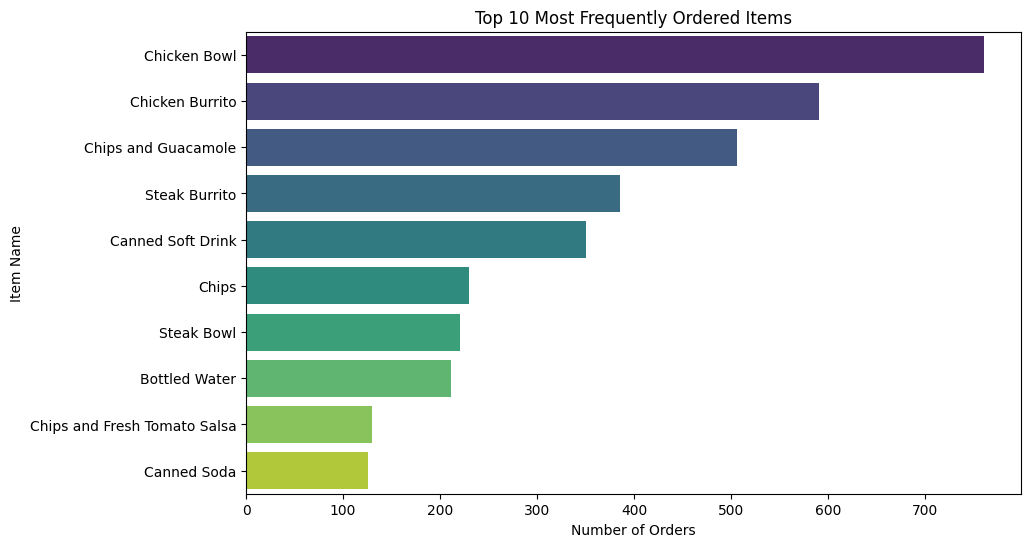

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x=popular_items.values, y=popular_items.index, palette="viridis")
plt.title("Top 10 Most Frequently Ordered Items")
plt.xlabel("Number of Orders")
plt.ylabel("Item Name")
plt.show()

**Revenue per Item (menu contribution)**

In [34]:
menu_revenue = (
    df.groupby('item_name')['item_price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 Items by Revenue:")
print(menu_revenue)

Top 10 Items by Revenue:
item_name
Chicken Bowl                    8044.63
Chicken Burrito                 6387.06
Steak Burrito                   4236.13
Steak Bowl                      2479.81
Chips and Guacamole             2475.62
Chicken Salad Bowl              1506.25
Chicken Soft Tacos              1199.01
Chips and Fresh Tomato Salsa    1033.96
Veggie Burrito                  1002.27
Veggie Bowl                      901.95
Name: item_price, dtype: float64


/tmp/ipython-input-576475629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=menu_revenue.values, y=menu_revenue.index, palette="magma")


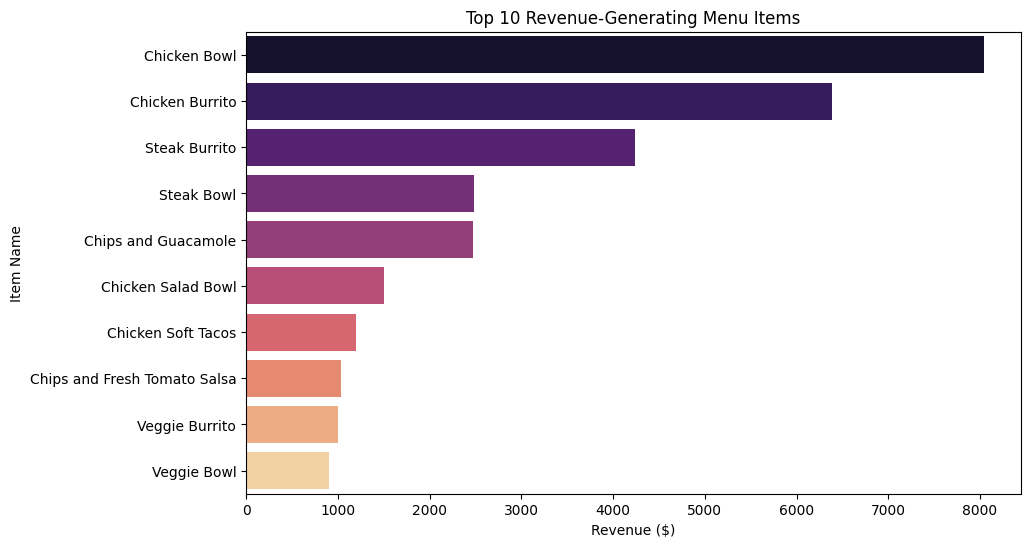

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x=menu_revenue.values, y=menu_revenue.index, palette="magma")
plt.title("Top 10 Revenue-Generating Menu Items")
plt.xlabel("Revenue ($)")
plt.ylabel("Item Name")
plt.show()

**Price Sensitivity (Distribution of Prices)**

I already plotted this in Module 1, but here we connect it to menu strategy

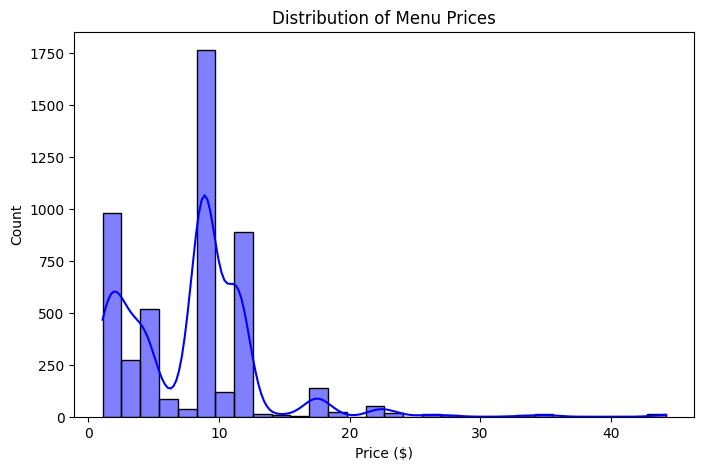

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(df['item_price'], bins=30, kde=True, color="blue")
plt.title("Distribution of Menu Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

**Basket Insights (bundles)**

I already built this in Module 2:

/tmp/ipython-input-1934102269.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='pair', data=pair_df, palette="plasma")


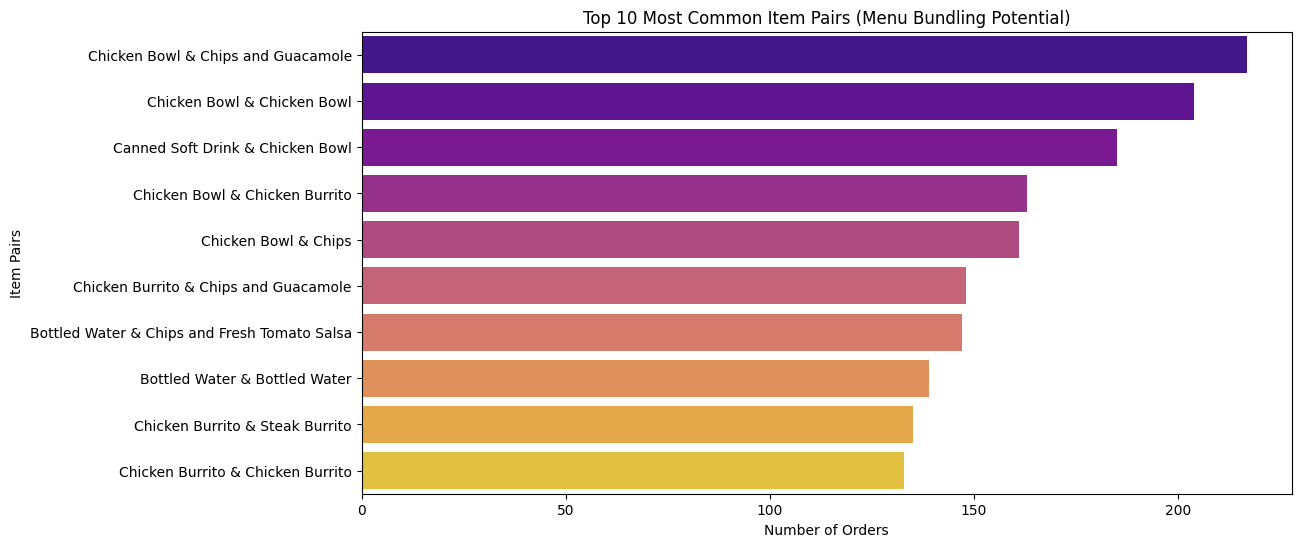

In [37]:
from itertools import combinations
from collections import Counter

# Group items per order
order_groups = df.groupby('order_id')['item_name'].apply(list)

# Count item pairs
pair_counter = Counter()
for items in order_groups:
    if len(items) > 1:
        pair_counter.update(combinations(sorted(items), 2))

# Convert to DataFrame
pair_df = pd.DataFrame(pair_counter.most_common(10), columns=['pair', 'count'])
pair_df['pair'] = pair_df['pair'].apply(lambda x: ' & '.join(x))  # convert tuple to string

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='count', y='pair', data=pair_df, palette="plasma")
plt.title("Top 10 Most Common Item Pairs (Menu Bundling Potential)")
plt.xlabel("Number of Orders")
plt.ylabel("Item Pairs")
plt.show()

**🔹 Business Interpretation for Module 4**

Chicken Burrito & Chips shows up frequently → Chipotle can promote this as a combo meal deal.

Burritos & Drinks appear together → suggests customers already create natural “meal bundles,” which can be formalized on the menu.

Bowls with Guacamole are strong pairings → Chipotle can upsell premium add-ons like guac or extra protein.

These insights go beyond counting orders — they highlight bundling opportunities that improve customer value and AOV.

# **Module 4: Menu Performance & Insights — Outcome**
🔹 What I Did

I analyzed the dataset to find the most popular menu items by frequency of orders.

I calculated the top revenue-generating items to see which menu choices contributed most to Chipotle’s overall sales.

I visualized the distribution of item prices to check pricing patterns across the menu.

I revisited the basket analysis (item pairs) and reframed it as a menu bundling strategy, showing which items are most commonly ordered together.

🔹 What I Found

I found that Chicken Burritos and Chips dominated in terms of both popularity and revenue contribution.

The revenue analysis revealed that while many items were ordered, a handful of them drove the majority of sales.

The price distribution showed that most items fall in the $2–$10 range, which fits Chipotle’s affordable fast-casual positioning.

The basket analysis showed clear pairing patterns:

Burritos with Chips and Drinks → natural combo meals.

Bowls with Guacamole → strong upsell opportunities for add-ons.

🔹 Why It Matters

By identifying popular items, Chipotle can prioritize marketing and promotions around customer favorites.

By analyzing revenue contribution, Chipotle can focus on high-profit items and consider adjusting prices where needed.

The basket insights reveal strong opportunities for combo deals and upselling premium add-ons, which can increase the Average Order Value (AOV) and overall profitability.

In short: I connected menu data to business strategy, showing how Chipotle can leverage item popularity, revenue drivers, and natural bundles to optimize its menu, boost sales, and enhance customer experience.

# **Final Summary & Next Steps**
🔹 What I Achieved

I started with a raw Chipotle dataset and transformed it into a business-ready dataset through cleaning and preparation.

I performed Revenue & Pricing Analysis to uncover top-performing items, average customer spend, and natural item bundles.

I measured Customer Engagement (DAU & WAU) to understand daily loyalty vs. weekly retention patterns.

I analyzed Menu Performance & Insights, connecting data to menu strategy, bundling opportunities, and upselling potential.

🔹 Key Business Insights

Demand Accuracy: Cleaned data ensured every burrito, taco, and chips bag was counted correctly, giving Chipotle reliable demand insights.

Revenue Drivers: A small set of items (e.g., Chicken Burritos & Chips) contributed heavily to revenue, making them critical for promotions.

Customer Loyalty: DAU fluctuates, but WAU remained strong, showing customers may not order daily but do return weekly.

Menu Strategy: Natural bundles like Burrito + Chips + Drink can be formalized into combo meals to lift AOV.

🔹 Next Steps (Future Enhancements)

Add Monthly Active Users (MAU) for a broader view of engagement.

Build a time-series model to forecast daily/weekly sales and engagement.

Incorporate customer sentiment analysis from Yelp or Twitter to connect orders with customer satisfaction.

Extend basket analysis into association rules (Apriori/FP-Growth) for deeper product recommendation insights.

In short: This project demonstrates how I can take raw transactional data and turn it into actionable business insights that support growth, retention, and menu optimization.
